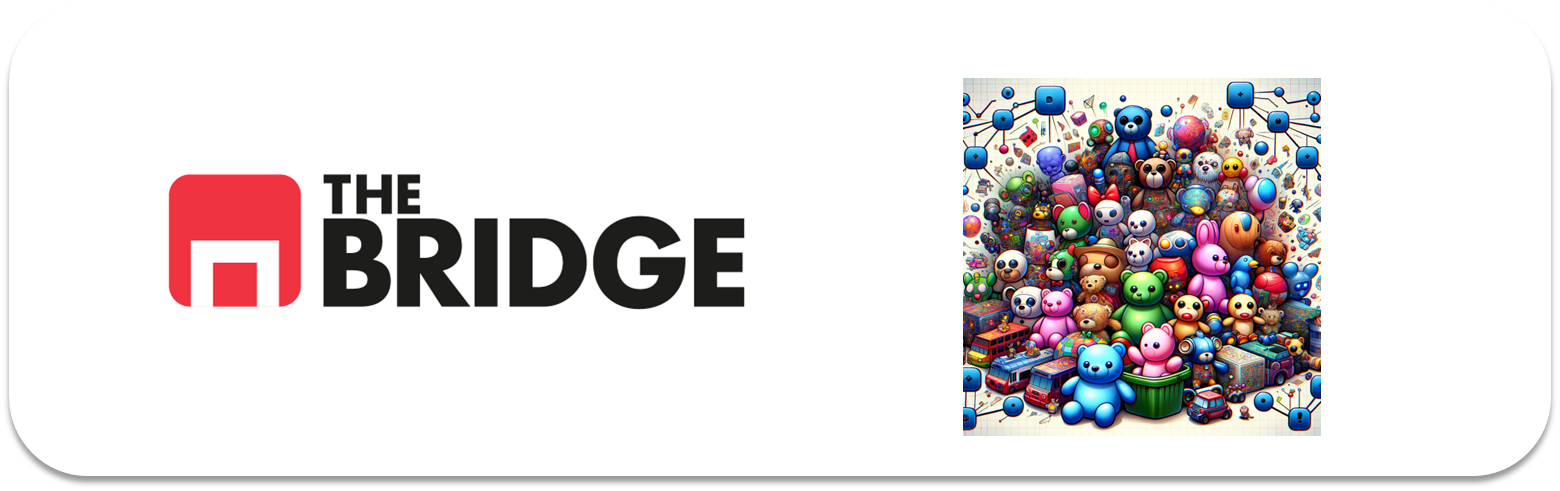

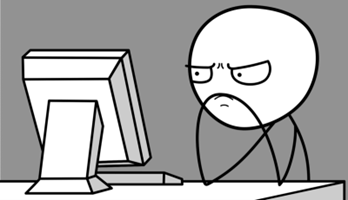

Para ejercitarte y afianzar lo aprendido sobre **DBSCAN**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Problema y "justificación": DBSCAN

Como sabemos, existen diversas técnicas de clusterización comprendidas por algoritmos de machine learning no supervisados, cuya finalidad es agrupar distintos elementos de una data sin la necesidad de estar previamente etiquetados. 

Anteriormente utilizamos el algoritmo de KMeans, sin embargo, dicho algoritmo tiene algunas limitaciones, como el hecho de que no siempre es sencillo obtener un número de K clusters óptimo o que algunas distribuciones de datos no se ajustan a la agrupación por clusters debido a la naturaleza del algoritmo. Para estos casos existen diversos algoritmos de clusterización. 

A continuación, vamos a utilizar el algoritmo DBSCAN (Density-Based Spatial Clustering of Applications with Noise) para capturar grupos en data con patrones relativamente complejos.

Utilizaremos data de clientes de un distribuidor al por mayor, en el que se recogen por línea ventas a diferentes establecimientos y empresas de sus productos (aunque no se incluye el identificador de establecimiento) y cuyo objetivo es obtener agrupacioines interesantes (agrupaciones no predefinidas de productos que se suelen comprar juntos):

Features:

    1) FRESH: Gastos en productos frescos;
    2) MILK: Gastos en productos lacteos;
    3) GROCERY: Gastos en comestibles;
    4) FROZEN: Gastos en congelados;
    5) DETERGENTS_PAPER: Gastos en detergentes y derivados del papel;
    6) DELICATESSEN: Gatos en comestibles finos;
    7) CHANNEL: Canal que utilizan los clientes para vender - Horeca (Hotel/Restaurant/Cafeterías) o Retail channel (Al por menor);
    8) REGION: Región del cliente;

Fuente: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors



### Ejercicio 1

Carga los datos y haz una primera exploración, incluyendo una descripción de las variables numéricas.

In [2]:
# Cargar el dataset
file_path = r"C:\Users\mario\Documents\GitHub\ONLINE_DS_THEBRIDGE_27MarioGomez\04_Machine_Learning\Sprint_13\Unidad_02\Ejercicios_Workout\data\wholesale-customers-data.csv"
df = pd.read_csv(file_path)

# Mostrar las primeras filas
print(df.head())

# Información general del dataset
print(df.info())

# Estadísticas descriptivas
print(df.describe())


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen  

$$***$$

Es hora de hacer un miniEda (cuyo objetivo en el caso de clusterizacion no es obtener features para predicción de un target que no tenemos), cuyo objetivo es poder intuir posibles agrupaciones y su número, detectar si hay que hacer transformaciones y escalado en las variables y cuál

### Ejercicio 2



Pinta el histograma de las variables y determina cuáles podríamos considerar numéricas continuas y cuáles numéricas discretas (o categóricas)

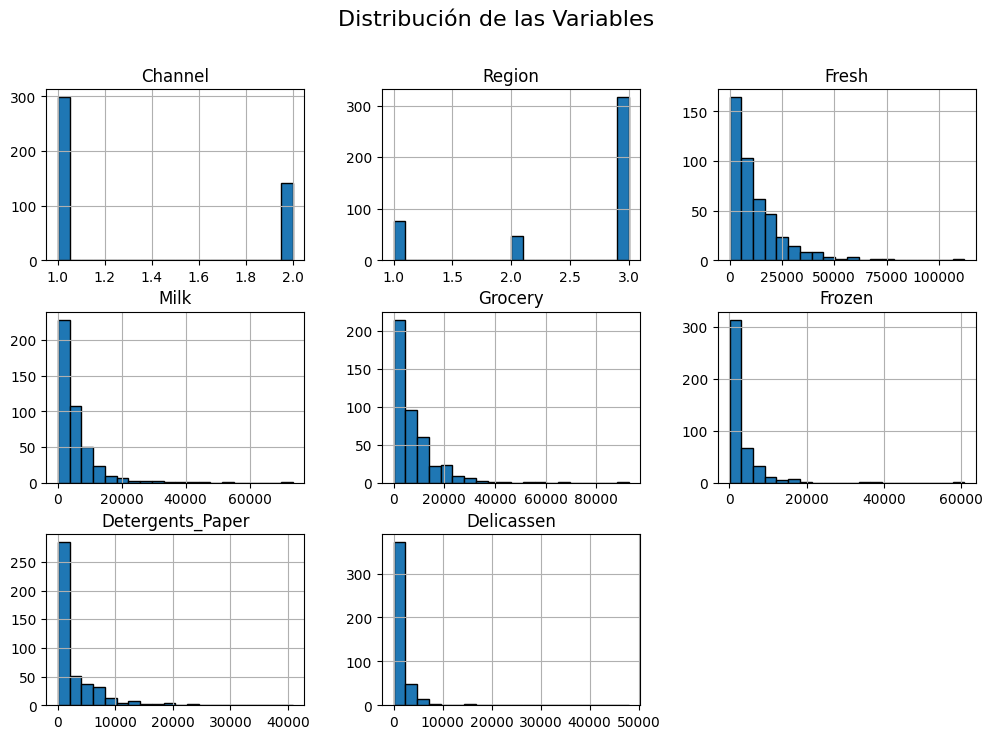

In [3]:
# Graficar histogramas de todas las variables numéricas
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Distribución de las Variables", fontsize=16)
plt.show()


### Ejercicio 3

Antes de decidir sobre las agrupaciones, vamos pintar los histrogramas pero separando por canal (ya que es un elemento muy diferenciador del tipo de venta que se realiza a mayorista). Muestra graficamente para cada variable numérica su histograma para cada canal (Horeca y Retail). 

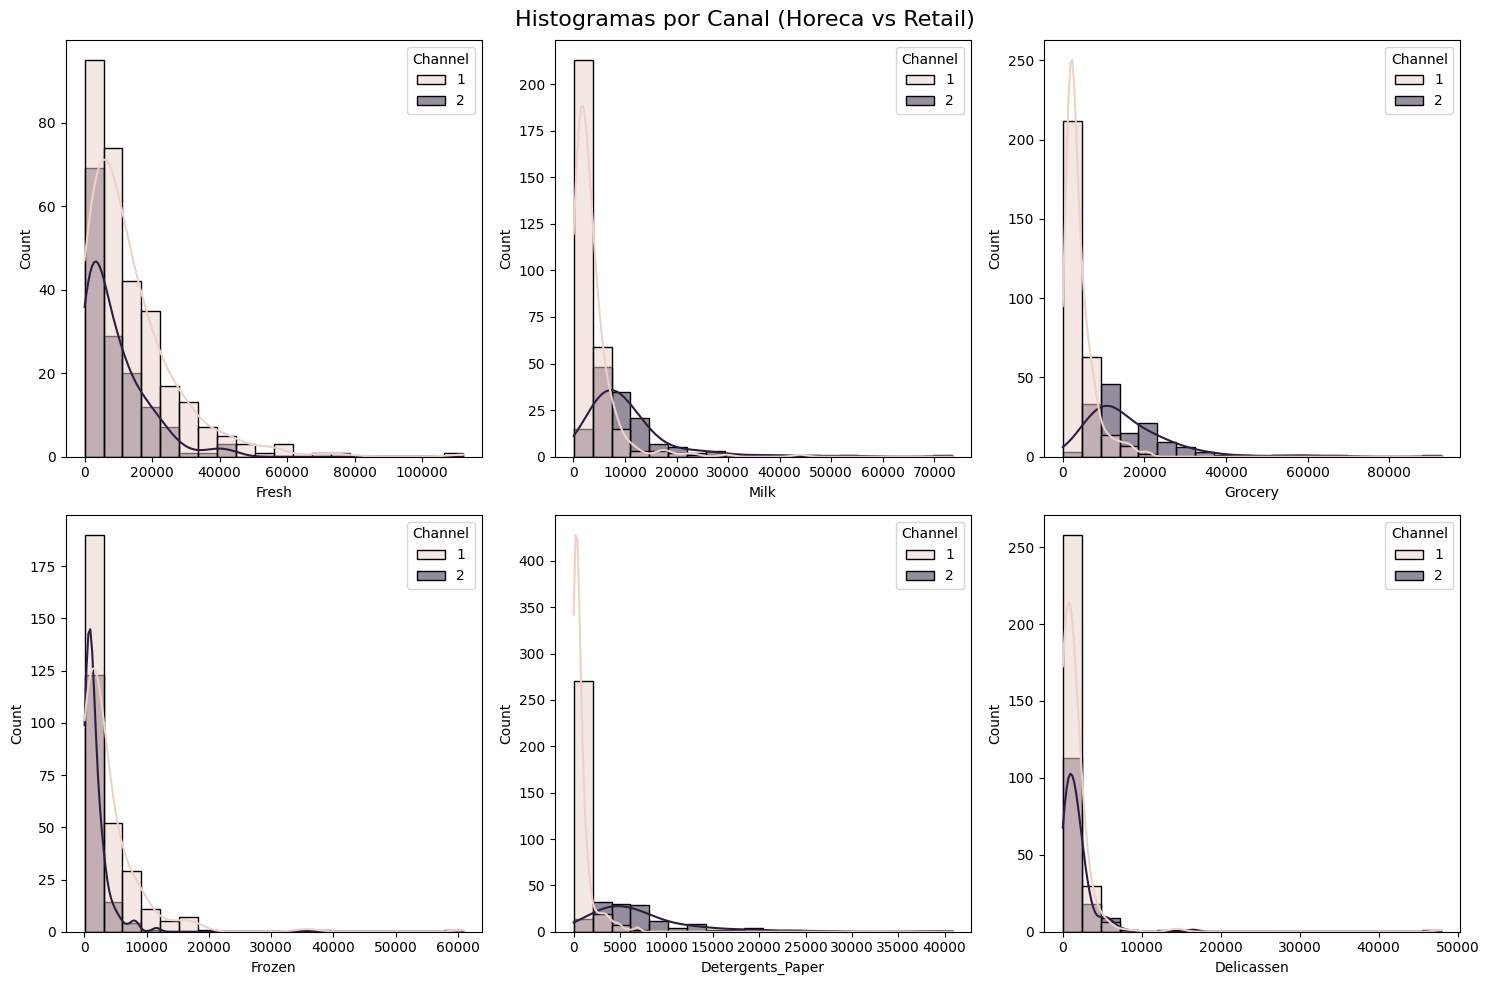

In [4]:
# Crear histogramas separados por canal
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle("Histogramas por Canal (Horeca vs Retail)", fontsize=16)

for idx, column in enumerate(df.columns[2:]):  # Excluyendo 'Region' y 'Channel'
    row, col = divmod(idx, 3)
    sns.histplot(data=df, x=column, hue="Channel", kde=True, bins=20, ax=axes[row, col])
    
plt.tight_layout()
plt.show()


### Ejercicio 4

Analicemos los outliers. Obten los outliers a partir de los diagramas de boxplot para todos los datos y luego separados por canal.

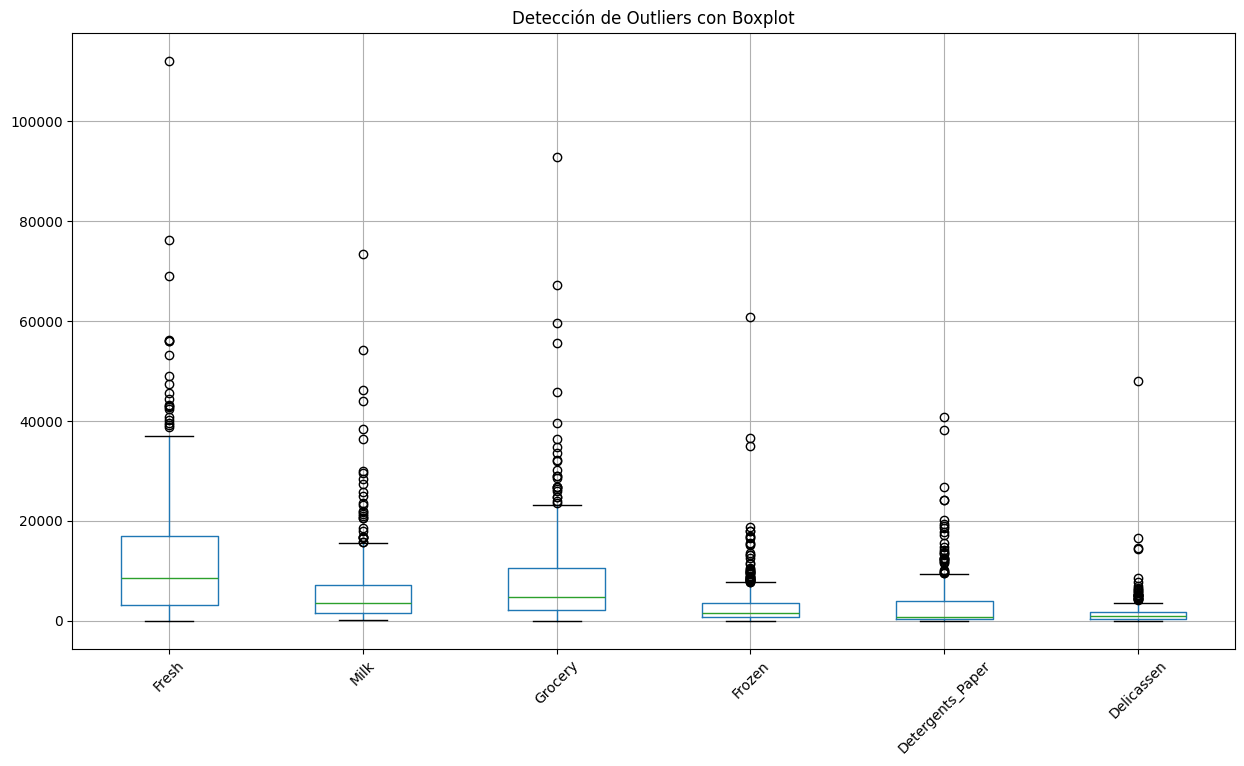

In [5]:
# Graficar boxplots para detectar outliers
plt.figure(figsize=(15, 8))
df.drop(columns=['Channel', 'Region']).boxplot()
plt.xticks(rotation=45)
plt.title("Detección de Outliers con Boxplot")
plt.show()


### Ejercicio 5

Vamos a intentar detectar posibles agrupaciones en los datos con variables dos a dos. Utiliza un pairplot de sns para mostrar los scatter plots de las variables numéricas dos a dos e intentar visualizar algún clustering e incluso justificar usar kMeans o DBSCAN. En este ejercicio hazlo para todo el dataset.

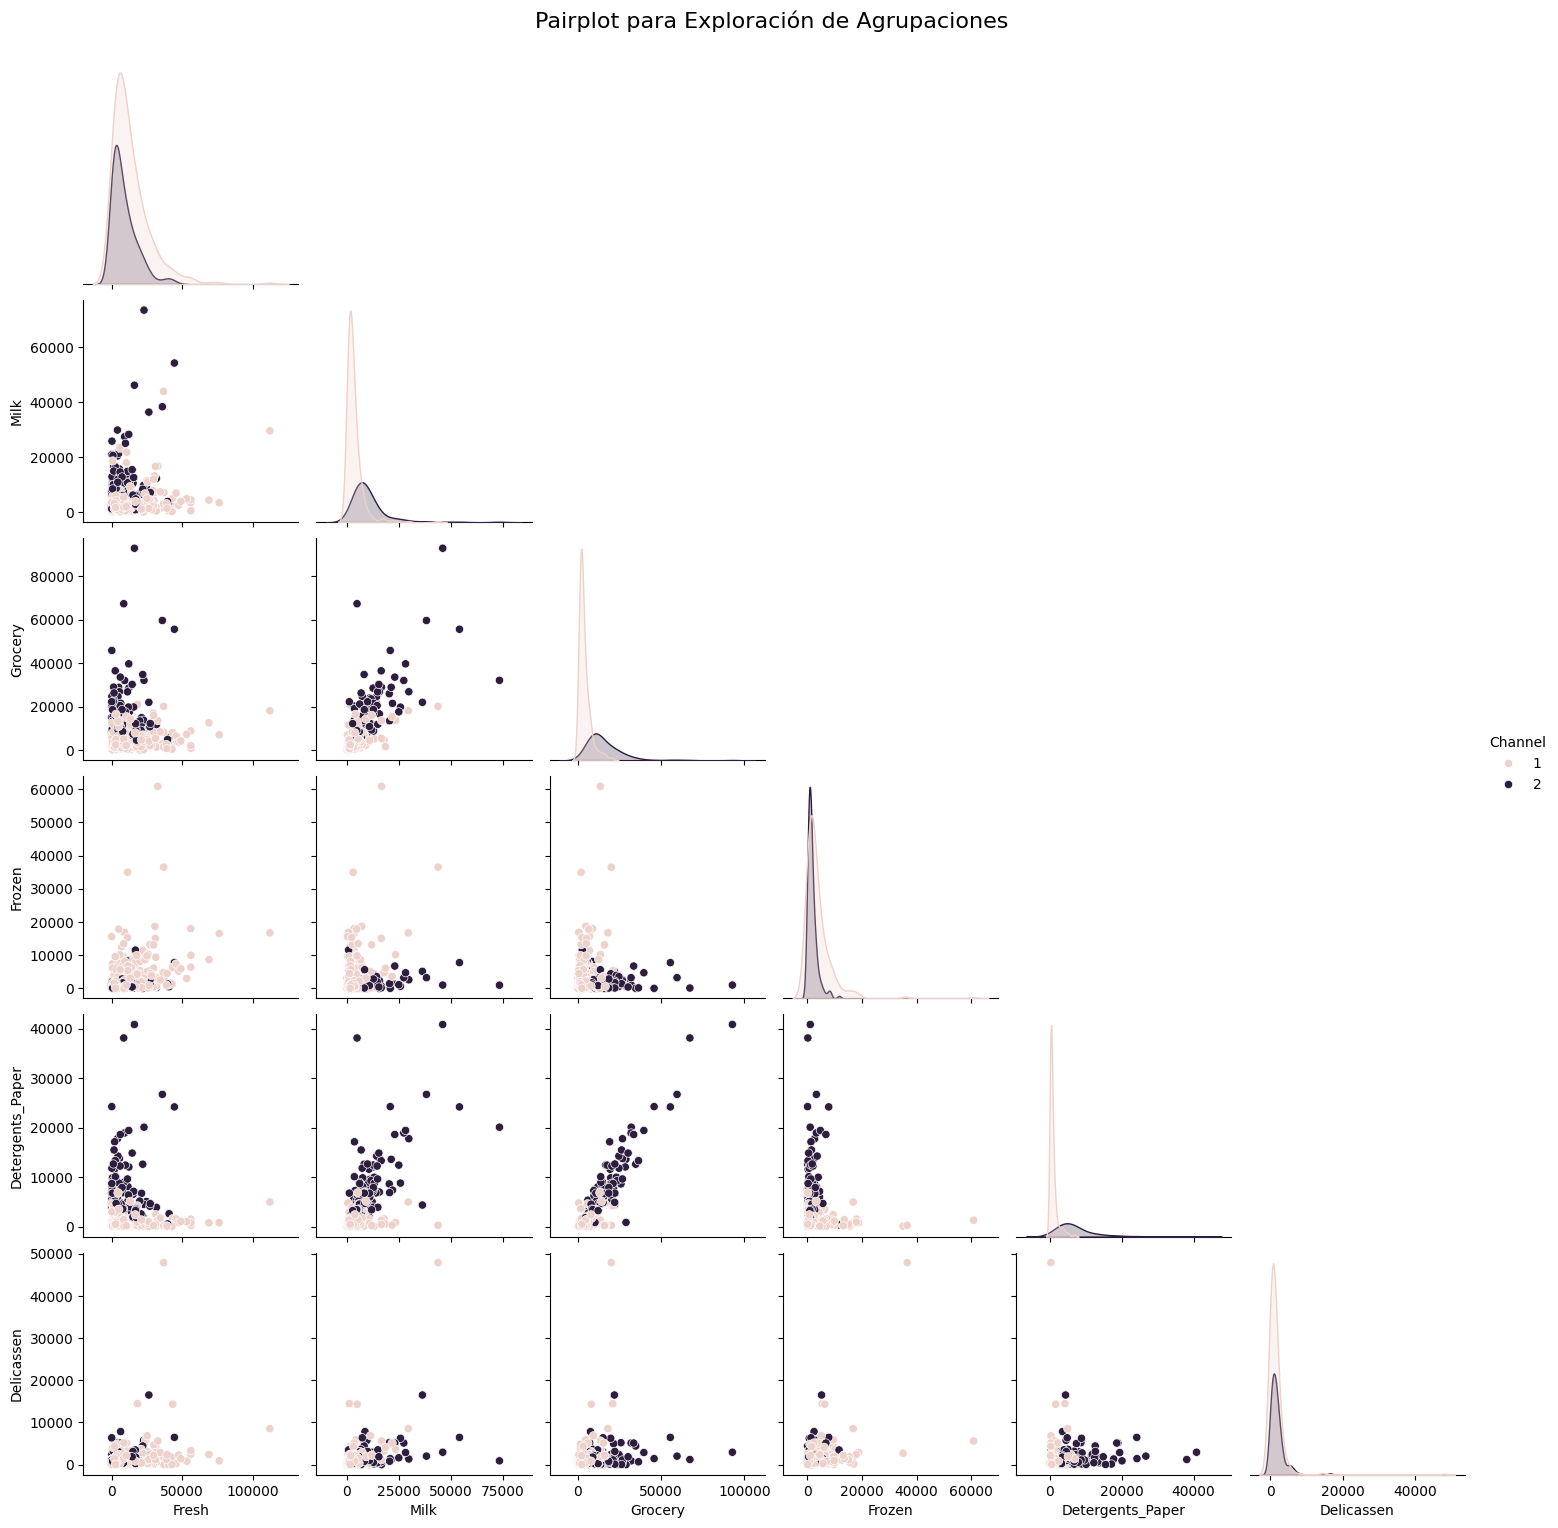

In [6]:
# Pairplot para observar clusters
sns.pairplot(df.drop(columns=['Region']), hue="Channel", diag_kind="kde", corner=True)
plt.suptitle("Pairplot para Exploración de Agrupaciones", y=1.02, fontsize=16)
plt.show()


### Ejercicio 6

Repite el ejercicio 5 pero separando por canal. Emplea el argumento hue del pairplot para no tener que hacer dos pairplots diferentes. 

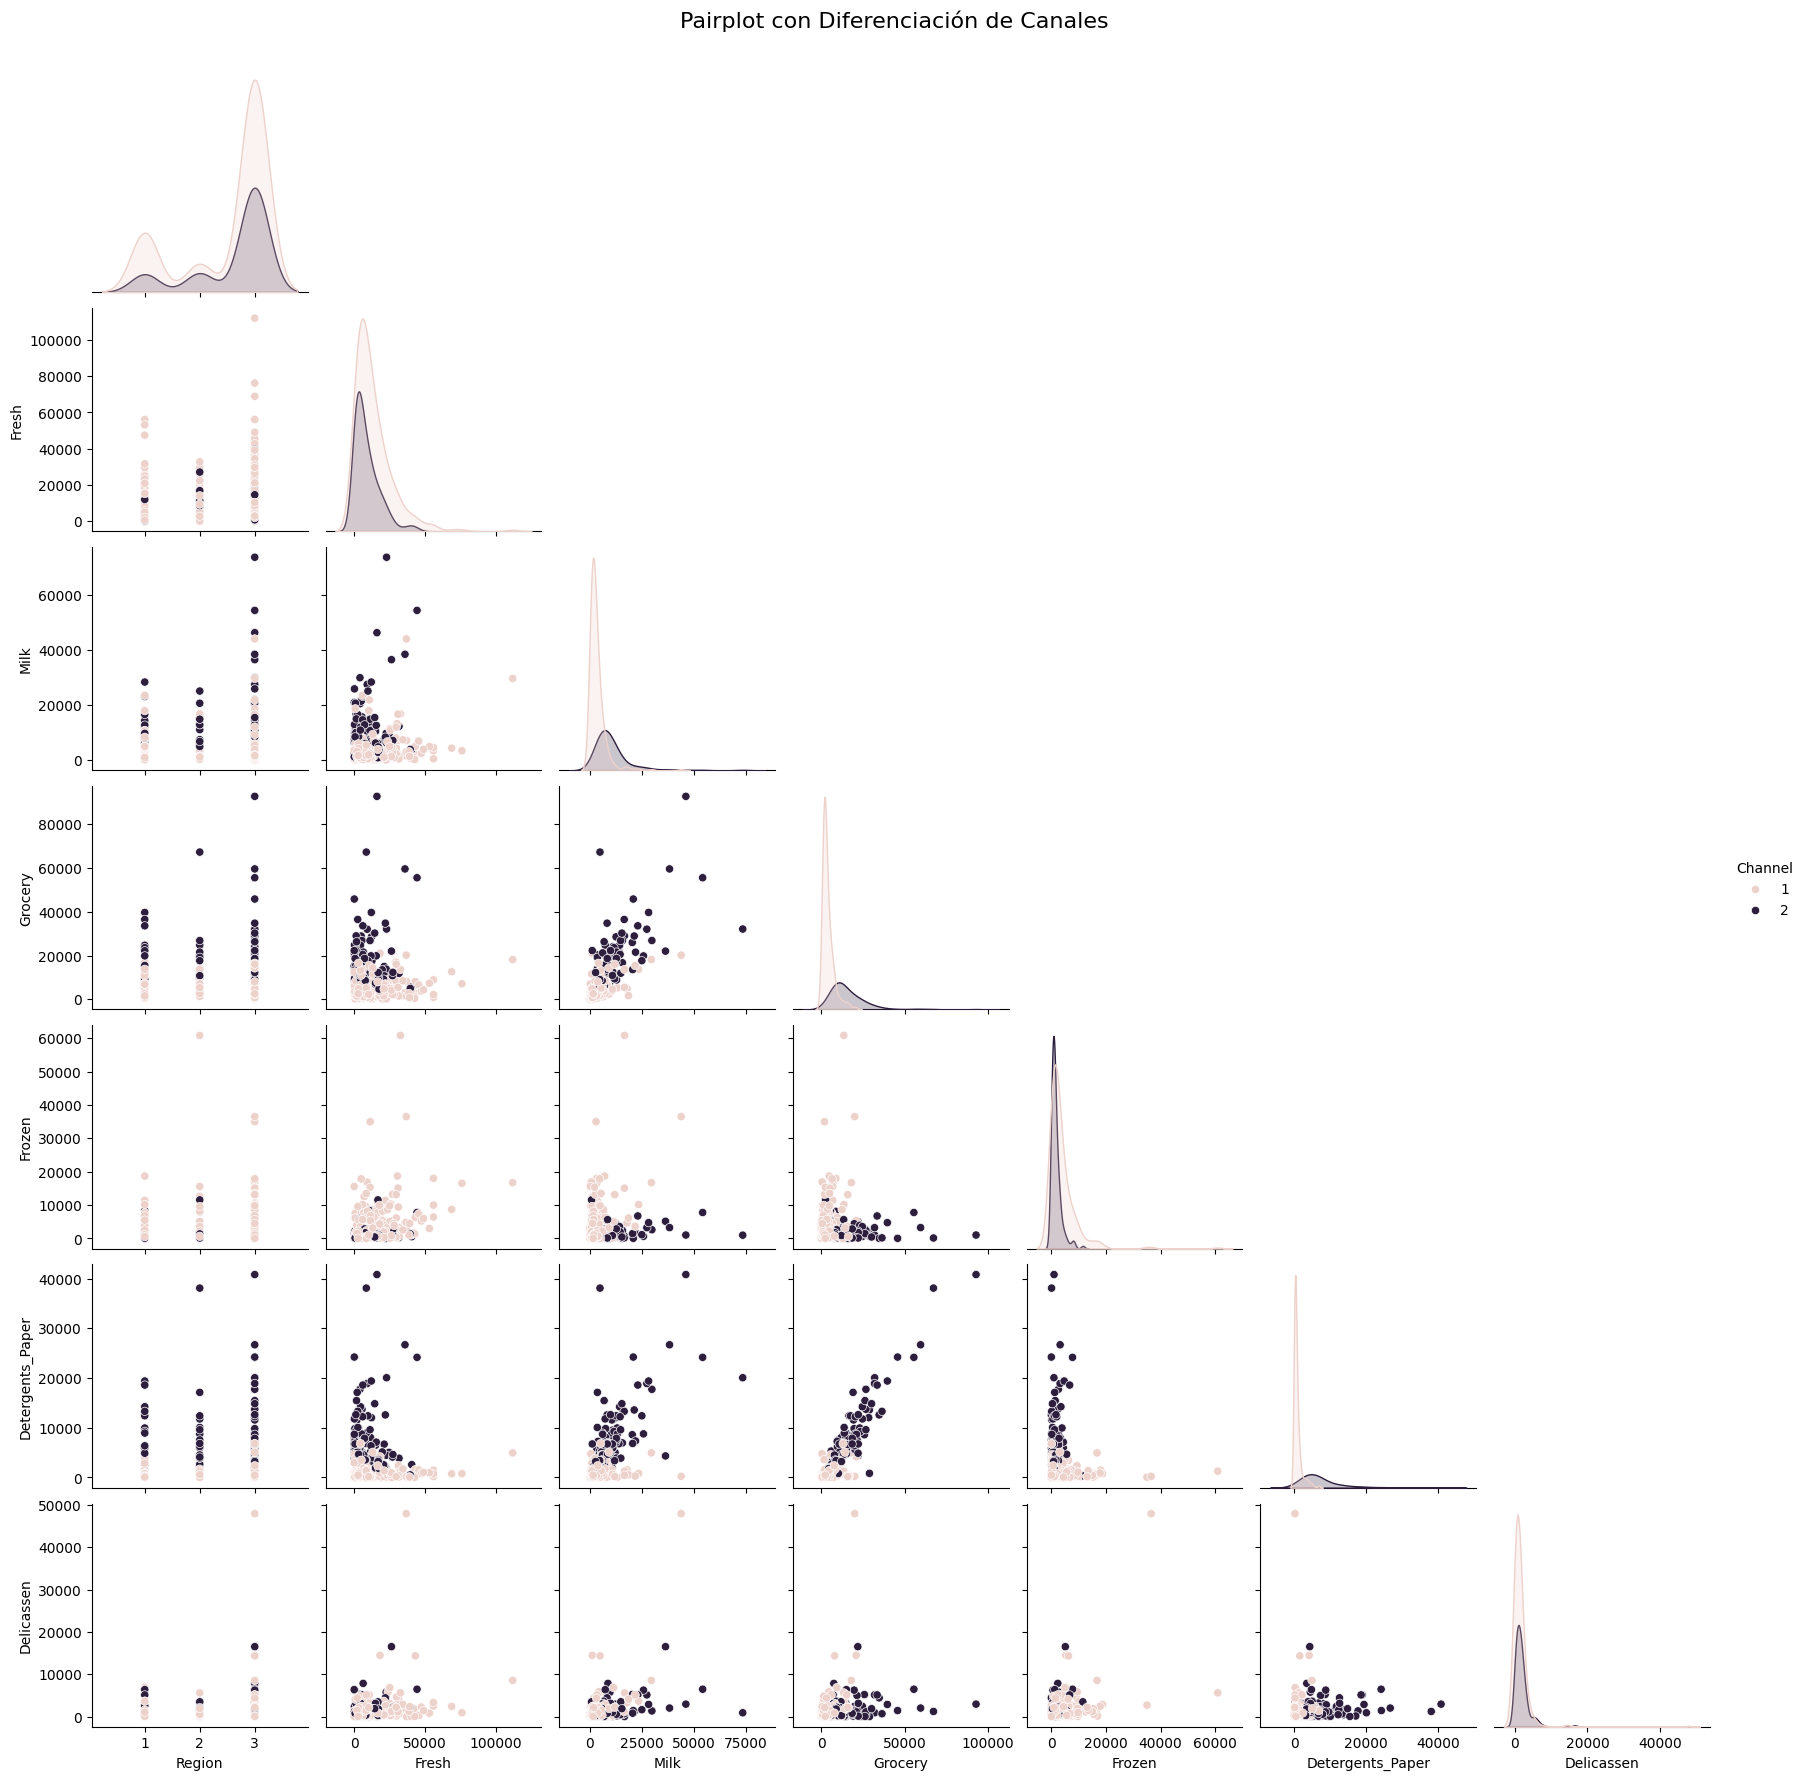

In [7]:
# Pairplot con separación por 'Channel'
sns.pairplot(df, hue="Channel", diag_kind="kde", corner=True)
plt.suptitle("Pairplot con Diferenciación de Canales", y=1.02, fontsize=16)
plt.show()


### Ejercicio 7

Si has logrado hacer los dos ejercicios anteriores (y si no consulta su solución) tendrás una idea un poco más clara de por qué es interesante la clusterización con DBSCAN mejor que con KMeans. Así que vamos a utilizarlo, pero antes escalemos los datos, transformándolos primero (de primeras no vamos a distinguir entre canales, hazlo con todo el dataseet). Es decir aplica la tranformación que creas necesaria en las columnas numéricas que creas conveniente. Hazlo en un dataframe copiado del original para poder interpretar los valores correctamente al final.

In [8]:
# Escalar los datos (sin incluir Channel y Region)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['Channel', 'Region']))
df_scaled = pd.DataFrame(scaled_features, columns=df.drop(columns=['Channel', 'Region']).columns)

# Mostrar estadísticas después del escalado
print(df_scaled.describe())


              Fresh        Milk       Grocery        Frozen  Detergents_Paper  \
count  4.400000e+02  440.000000  4.400000e+02  4.400000e+02      4.400000e+02   
mean  -3.431598e-17    0.000000 -4.037175e-17  3.633457e-17      2.422305e-17   
std    1.001138e+00    1.001138  1.001138e+00  1.001138e+00      1.001138e+00   
min   -9.496831e-01   -0.778795 -8.373344e-01 -6.283430e-01     -6.044165e-01   
25%   -7.023339e-01   -0.578306 -6.108364e-01 -4.804306e-01     -5.511349e-01   
50%   -2.767602e-01   -0.294258 -3.366684e-01 -3.188045e-01     -4.336004e-01   
75%    3.905226e-01    0.189092  2.849105e-01  9.946441e-02      2.184822e-01   
max    7.927738e+00    9.183650  8.936528e+00  1.191900e+01      7.967672e+00   

         Delicassen  
count  4.400000e+02  
mean  -8.074349e-18  
std    1.001138e+00  
min   -5.402644e-01  
25%   -3.964005e-01  
50%   -1.985766e-01  
75%    1.048598e-01  
max    1.647845e+01  


### Ejercicio 8

Escala las columnas que creas necesario. Si no lo tienes claro, escala todas.

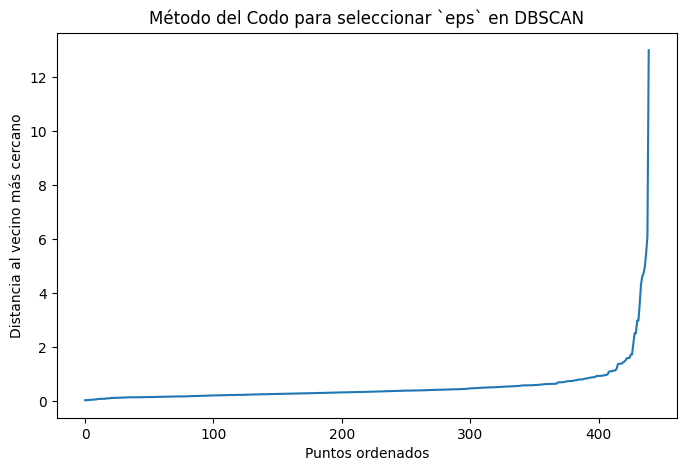

In [9]:
# Determinar el mejor `eps` con NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)

# Ordenar y graficar las distancias
distances = np.sort(distances[:, 1])
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel("Puntos ordenados")
plt.ylabel("Distancia al vecino más cercano")
plt.title("Método del Codo para seleccionar `eps` en DBSCAN")
plt.show()


### Ejercicio 9

En el caso de los modelos no supervisados, una vez hemos tratado las features hay que escoger los hiperparámetros. En el caso de dBSCAN no es el número de clústeres, sino la distancia `eps` que determina el vecindario de un punto y el número de vecinos a partir del cual se decide si una instancia es core o no (`min_samples`). 

Una forma de hacerlo es iterar sobre rangos de estos dos hiperparámetros midiendo el porentaje de "anomalías" que detecta y considerando como punto de parada un valor por debajo del 10%.

NOTA: Usa el doble de cantidad de tus features para el mínimo de elementos y un rango para el epsilon de 0.001 a 3. Para min_samples vamos a usar un valor "estimado" que corresponde a 2 veces el número de features empleadas.

In [10]:
# Ajustar el modelo DBSCAN con parámetros óptimos (ajustar eps basado en la gráfica anterior)
eps_opt = 1.2  # Ajusta según el resultado del método del codo
min_samples_opt = 2 * df_scaled.shape[1]  # Regla: el doble del número de features

dbscan = DBSCAN(eps=eps_opt, min_samples=min_samples_opt)
df['Cluster'] = dbscan.fit_predict(df_scaled)

# Mostrar conteo de clusters detectados
print(df['Cluster'].value_counts())


Cluster
 0    398
-1     42
Name: count, dtype: int64


### Ejercicio 10

Entrena un clustering DBSCAN con el valor que hayas encontrado como mejor en el ejercicio anterior (si no has visto claramente un valor, usa eps = 2) y `min_samples` a dos veces el número de features empleadas.

C:\Users\mario\AppData\Local\Temp\ipykernel_26608\2421803020.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Cluster'], palette="viridis")


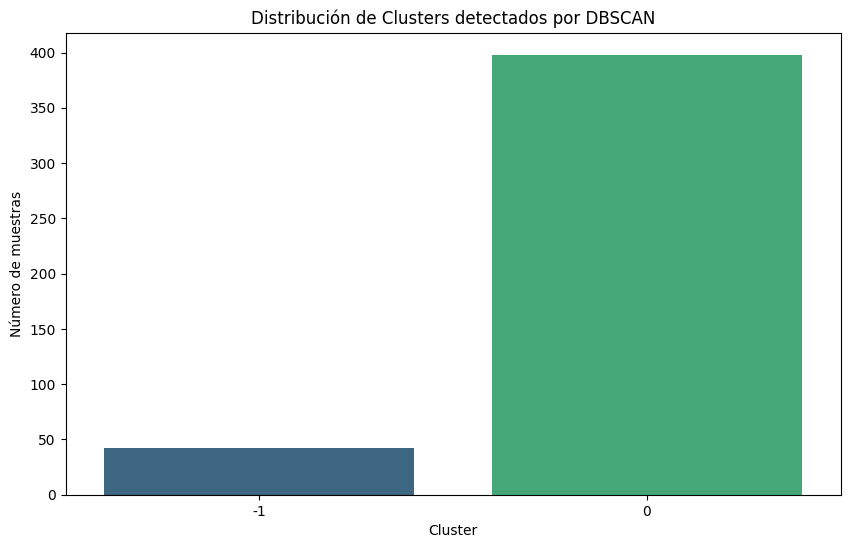

In [11]:
# Visualizar distribución de clusters
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Cluster'], palette="viridis")
plt.title("Distribución de Clusters detectados por DBSCAN")
plt.xlabel("Cluster")
plt.ylabel("Número de muestras")
plt.show()


### Ejercicio 11

Agrega las etiquetas generadas con DBSCAN a tu dataframe original e interpreta los resultados (observa el número de etiquetas, recuerda que -1 no es un cluster son anomalías o outliers) luego contesta a: ¿Qué grupos o patrones fué capaz de capturar el DBSCAN? (Haz las tablas de contingencia de las etiquetas con las dos variables categóricas, por separado, por ejemplo y a partir de ahí justifica tu respuesta)


Promedio de compras por cluster:
              Grocery          Milk  Detergents_Paper
Cluster                                              
-1       23796.261905  19442.357143       9702.738095
 0        6279.193467   4356.226131       2161.663317

Cantidad de elementos por cluster:
Cluster
 0    398
-1     42
Name: count, dtype: int64

Número de Outliers detectados: 42

Tabla de contingencia entre Cluster y Channel:
Channel    1    2
Cluster          
-1        18   24
 0       280  118

Tabla de contingencia entre Cluster y Region:
Region    1   2    3
Cluster             
-1        7   4   31
 0       70  43  285


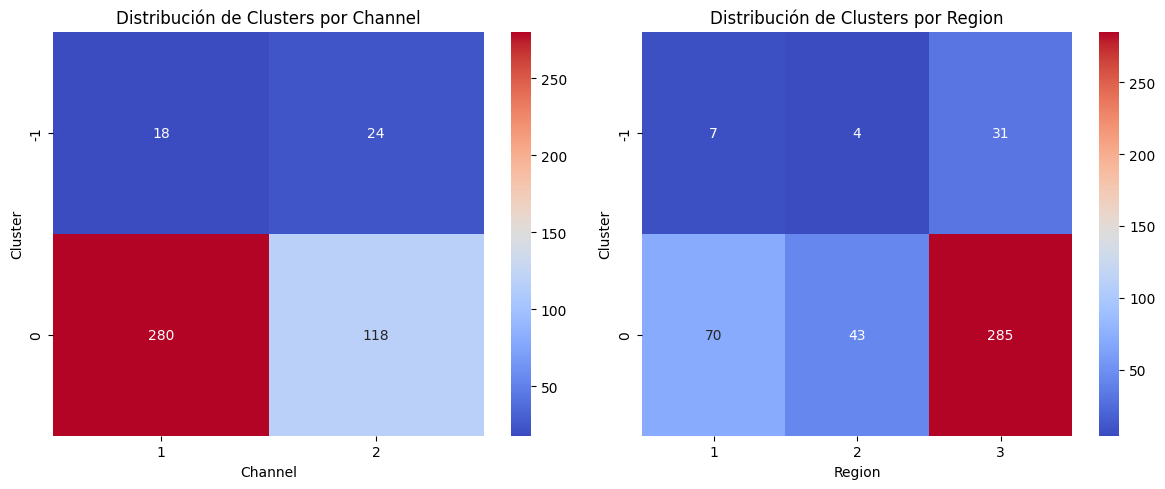

In [13]:
import pandas as pd

# Agregar las etiquetas generadas por DBSCAN al DataFrame original
df['Cluster'] = dbscan.labels_

# Revisar qué patrones capturó DBSCAN en términos de compras
print("\nPromedio de compras por cluster:")
print(df.groupby("Cluster")[['Grocery', 'Milk', 'Detergents_Paper']].mean())

# Mostrar la cantidad de elementos en cada cluster
print("\nCantidad de elementos por cluster:")
print(df['Cluster'].value_counts())

# Identificar los outliers (-1 representa datos que DBSCAN no pudo agrupar)
outliers = df[df["Cluster"] == -1]
print(f"\nNúmero de Outliers detectados: {len(outliers)}")

# Tablas de contingencia para analizar relación entre Cluster y las variables categóricas
contingencia_channel = pd.crosstab(df['Cluster'], df['Channel'])
contingencia_region = pd.crosstab(df['Cluster'], df['Region'])

print("\nTabla de contingencia entre Cluster y Channel:")
print(contingencia_channel)

print("\nTabla de contingencia entre Cluster y Region:")
print(contingencia_region)

# Visualizar la distribución de los clusters con respecto a las variables categóricas
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(contingencia_channel, annot=True, fmt='d', cmap='coolwarm', ax=axes[0])
axes[0].set_title("Distribución de Clusters por Channel")

sns.heatmap(contingencia_region, annot=True, fmt='d', cmap='coolwarm', ax=axes[1])
axes[1].set_title("Distribución de Clusters por Region")

plt.tight_layout()
plt.show()


# Análisis de Resultados: Clustering con DBSCAN

## Distribución de Clusters
- Se identificaron dos clusters (`0` y `-1`).
- `Cluster -1` representa 42 outliers.
- `Cluster 0` contiene la mayoría de los datos (398 clientes).

## Relación con Channel (Tipo de Cliente)
- `Cluster 0` agrupa tanto Horeca (280) como Retail (118).
- `Cluster -1` tiene una distribución más equilibrada (18 Horeca, 24 Retail).
- No hay una separación clara entre los tipos de cliente.

## Relación con Region (Ubicación)
- `Cluster 0` tiene una mayoría en la Región 3 (285 clientes).
- Outliers se distribuyen en todas las regiones, con mayor presencia en la Región 3 (31 puntos).
- La segmentación por región no es clara.

## Conclusión
- DBSCAN detectó outliers pero no separó bien los grupos.
- Se podría ajustar `eps` y `min_samples` para mejorar la segmentación.
- Otras técnicas como K-Means o Clustering Jerárquico podrían dar mejores resultados.
